In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

In [2]:
dataset = pandas.read_csv("C:/Users/DELL/OneDrive/Desktop/airline-passengers.csv", usecols=[1])

In [3]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [4]:
## converting dataframe into numpy array
dataset = dataset.values

In [6]:
## changing the datatype
dataset = dataset.astype('float32')

In [7]:
## Scaling

scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [8]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [9]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [11]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
## model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 5s - 53ms/step - loss: 0.0390
Epoch 2/100
94/94 - 1s - 6ms/step - loss: 0.0184
Epoch 3/100
94/94 - 1s - 6ms/step - loss: 0.0142
Epoch 4/100
94/94 - 1s - 7ms/step - loss: 0.0128
Epoch 5/100
94/94 - 1s - 6ms/step - loss: 0.0116
Epoch 6/100
94/94 - 1s - 5ms/step - loss: 0.0105
Epoch 7/100
94/94 - 1s - 6ms/step - loss: 0.0095
Epoch 8/100
94/94 - 1s - 5ms/step - loss: 0.0084
Epoch 9/100
94/94 - 1s - 6ms/step - loss: 0.0074
Epoch 10/100
94/94 - 1s - 6ms/step - loss: 0.0065
Epoch 11/100
94/94 - 1s - 6ms/step - loss: 0.0056
Epoch 12/100
94/94 - 1s - 6ms/step - loss: 0.0048
Epoch 13/100
94/94 - 1s - 6ms/step - loss: 0.0042
Epoch 14/100
94/94 - 1s - 6ms/step - loss: 0.0036
Epoch 15/100
94/94 - 1s - 6ms/step - loss: 0.0033
Epoch 16/100
94/94 - 1s - 6ms/step - loss: 0.0028
Epoch 17/100
94/94 - 1s - 6ms/step - loss: 0.0025
Epoch 18/100
94/94 - 1s - 6ms/step - loss: 0.0024
Epoch 19/100
94/94 - 1s - 7ms/step - loss: 0.0023
Epoch 20/100
94/94 - 1s - 6ms/step - loss: 0.0022
Epoch 21

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


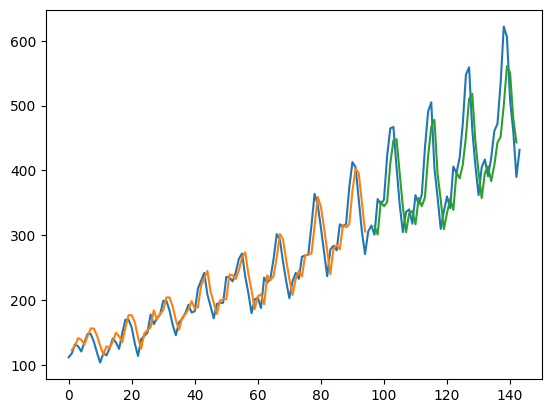

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()